In [1]:
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline
np.set_printoptions(suppress=True, precision=2)
plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
text_file = open("training_data.txt", "r")
train_N = text_file.read().split(' ') #N = Total no, of words from training set
K = list(set(train_N)) #K = 10,000 distinct words
c = collections.Counter(train_N)#c is a dictionary of 10,000 distinct words

In [3]:
new_test = open("test_data.txt", "r")
ttesting = new_test.read().split(' ') #all the words from test set

In [4]:
training_sets = []
training_sets.append(train_N[:5000]) #N/128
training_sets.append(train_N[:10000]) #N/64 
training_sets.append(train_N[:40000]) #N/16
training_sets.append(train_N[:160000]) #N/4
training_sets.append(train_N) #N

In [5]:
#training function
def training_process(alpha,trainingdataset,token):
    modelsML = []
    modelsMAP = []
    modelsPP = [] #a vector of 5 dictionaries
    K = 10000
    
    for each_set in trainingdataset:
        dictionary = collections.Counter(each_set)
        N = len(each_set) #5000 10000 ... 640000
        
        temp_model = collections.Counter()
        
        ML = collections.Counter()
        MAP = collections.Counter()
        PP = collections.Counter()
        for word in each_set:
            ML[word] = dictionary[word]/N
            MAP[word] = (dictionary[word]+alpha-1)/(N-K+(alpha*K))
            PP[word] = (dictionary[word]+alpha)/(N+(alpha*K))
            
        
        modelsML.append(ML)
        modelsMAP.append(MAP)
        modelsPP.append(PP)
            
    return modelsML,modelsMAP,modelsPP

In [22]:
def perplexity(model, run_test, token, alpha):
    
    N = len(run_test)
    K = 10000
    
    probability = np.zeros(len(run_test))
    for index,word in enumerate(run_test):
        probability[index] = model[word]

    for i in range(len(probability)):
        if probability[i] == 0:
            if token == 'ML':
                probability[i] = np.log(0.000000001)
            elif token == 'MAP':
                probability[i] = np.log((alpha-1)/(N+K))
            elif token == 'PP':
                probability[i] = np.log(alpha/(N+(alpha*K)))

        else:
            probability[i] = np.log(probability[i])
        


    pp = np.exp((-1/N)*np.sum(probability))
    return pp

In [23]:
def plot_data(mlmodels,mapmodel,pmodel,training,testing):
    
    #2 plots training & testing
    training_ml = []
    training_map = []
    training_p = []
    testing_ml = []
    testing_map = []
    testing_p = []
    
    for index in range(len(mlmodels)):

        temp_ml = perplexity(mlmodels[index],training[index],'ML',2)
        training_ml.append(temp_ml)
        
        temp_test_ml = perplexity(mlmodels[index],testing,'ML',2)
        testing_ml.append(temp_test_ml)
        
        temp_map = perplexity(mapmodel[index],training[index],'MAP',2)
        training_map.append(temp_map)
            
        temp_test_map = perplexity(mapmodel[index],testing,'MAP',2)
        testing_map.append(temp_test_map)
        
        temp_p = perplexity(pmodel[index],training[index],'PP',2)
        training_p.append(temp_p)
        
        temp_test_p = perplexity(pmodel[index],testing,'PP',2)
        testing_p.append(temp_test_p)
    

    training_para = [5000,10000,40000,160000,640000]
    plt.plot(training_para,training_ml,'-o',label="training_ml")
    plt.plot(training_para,training_map,'-o',label="training_map")
    plt.plot(training_para,training_p,'-o',label="training_p")
    plt.xlabel('Training set size')
    plt.ylabel('Perplexity')
    plt.ylim(2000,10000)
    plt.legend(loc='upper right')
    plt.title("Training perplexity")
    plt.show()
    
    plt.plot(training_para,testing_ml,'-o',label="testing_ml")
    plt.plot(training_para,testing_map,'-o',label="testing_map")
    plt.plot(training_para,testing_p,'-o',label="testing_p")
    plt.xlabel('Training set size')
    plt.ylabel('Perplexity')
    plt.legend(loc='upper right')
    plt.title("Testing perplexity")
    plt.show()
    
    print(testing_ml)
    print(testing_map)
    print(testing_p)


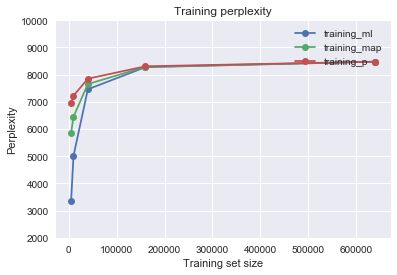

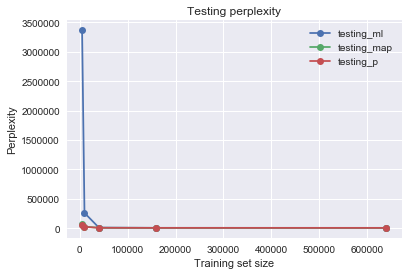

[3364468.6329755015, 262941.87364015356, 13278.746342540628, 8896.479676618837, 8612.445116409]
[78551.384840482, 29857.16761475715, 10187.89999407906, 8809.146656412731, 8609.629981597624]
[58240.914755969156, 25550.52739887495, 9970.380622742068, 8788.270012701903, 8608.067668723614]


In [40]:
mlml,mapmap,pppp = training_process(2,training_sets,'')
plot_data(mlml,mapmap,pppp,training_sets,ttesting)

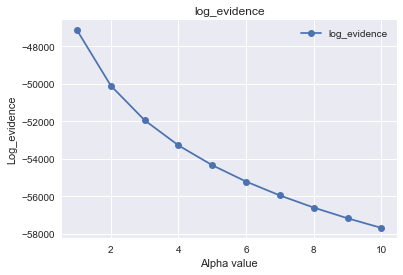

In [25]:
#Task 2
#run alpha = 1~10 for training set of size N/128 = 5000
task_2 = training_sets[0].copy()
dictionary_for_task_2 = collections.Counter(task_2)
list_of_dict = list(dictionary_for_task_2.items())
log_evidence = []
alpha_list = [1,2,3,4,5,6,7,8,9,10]
K = 10000
N = 5000



for a in alpha_list:
    #calculate the upper part
    left = 0
    alpha_0 = a*K
    temp_1 = 0
    temp_2 = 0
    
    for i in range(1,alpha_0):
        temp_1 = temp_1 + np.log(i)
    
    for i in range(1,alpha_0+N):
        temp_2 = temp_2 + np.log(i)
    
    left = temp_1 - temp_2
    
    
    right = 0

    for i in range(K):
        
        temp_3 = 0
        temp_4 = 0

        if K < 3685:
            m_j = list_of_dict[i][1]
        else:
            continue
        #alpha j = a
        

        for ii in range(1,m_j+a):
            temp_3 = temp_3 + np.log(ii)
        
        for ii in range(1,a):
            temp_4 = temp_4 + np.log(ii)
        
        right = right + temp_3 - temp_4
    
    result = left + right
    
    log_evidence.append(result)

plt.plot(alpha_list,log_evidence,'-o',label="log_evidence")
plt.xlabel('Alpha value')
plt.ylabel('Log_evidence')
#plt.ylim(0,120000)
plt.legend(loc='upper right')
plt.title("log_evidence")
plt.show()

In [42]:
def mini_train(alpha,trainingdataset):

    modelsPP = collections.Counter()
    K = 10000
    

    dictionary = collections.Counter(trainingdataset)
    N = 5000 #5000 10000 ... 640000
        
    temp_model = collections.Counter()

    for word in trainingdataset:
        modelsPP[word] = (dictionary[word]+alpha)/(N+(alpha*K))
        
            
    return modelsPP

In [47]:
def mini_perplexity(model, run_test,alpha):
    
    N = len(run_test)
    print(N)
    K = 10000
    
    probability = np.zeros(len(run_test))
    for index,word in enumerate(run_test):
        probability[index] = model[word]

    for i in range(len(probability)):
        if probability[i] == 0:
            probability[i] = np.log(alpha/(N+(alpha*K)))

        else:
            probability[i] = np.log(probability[i])
        


    pp = np.exp((-1/N)*np.sum(probability))
    return pp

640000
640000
640000
640000
640000
640000
640000
640000
640000
640000


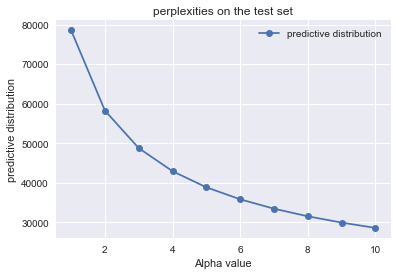

In [48]:
new_pp = []

for a in alpha_list:
    
    pp_task_2 = mini_train(a,training_sets[0])
    tmp = mini_perplexity(pp_task_2,ttesting,a)
    #tmp = perplexity(pp_task_2,ttesting,'PP',a)
    new_pp.append(tmp)
    
plt.plot(alpha_list,new_pp,'-o',label="predictive distribution")
plt.xlabel('Alpha value')
plt.ylabel('predictive distribution')
#plt.ylim(0,120000)
plt.legend(loc='upper right')
plt.title("perplexities on the test set")
plt.show()